In [32]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# get the df
df = pd.read_csv('data/aita_dataset/aita_clean.csv')

# reduce it
reduced_df = df[['title', 'body', 'is_asshole']]

In [33]:
reduced_df.head(3)

,title,body,is_asshole
0,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,1
1,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",1
2,I told a goth girl she looked like a clown.,I was four.,0


In [34]:
df.size

878652

In [35]:
# use smaller subset
df = df.sample(n=1000, random_state=42)

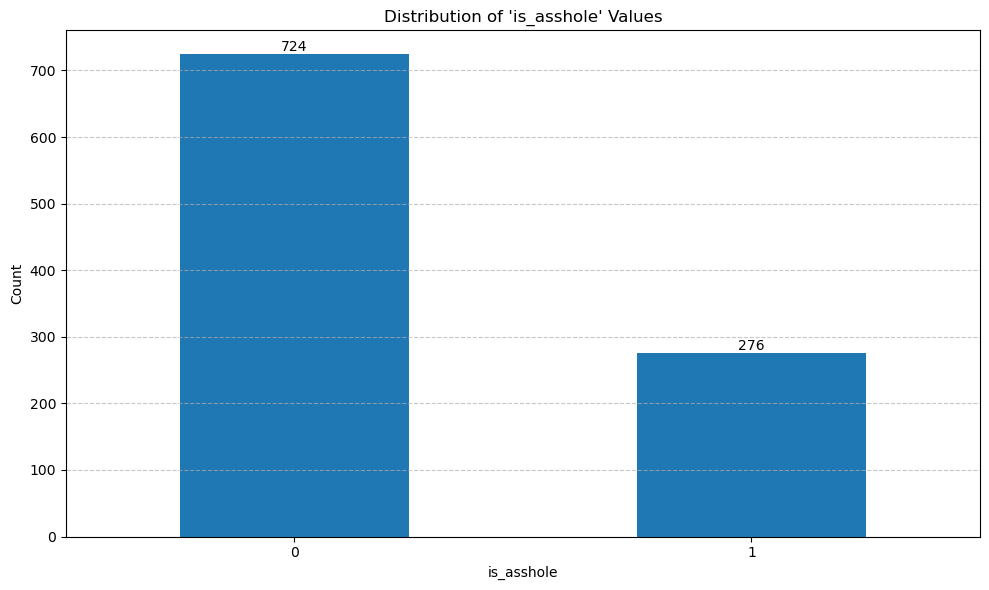

In [36]:
# Count the occurrences of each value in the 'is_asshole' column
asshole_counts = df['is_asshole'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
asshole_counts.plot(kind='bar')

# Customize the chart
plt.title("Distribution of 'is_asshole' Values")
plt.xlabel("is_asshole")
plt.ylabel("Count")

# Add value labels on top of each bar
for i, v in enumerate(asshole_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
import os

filename = 'title_embeddings_subset1000_rand42.npy'

if os.path.exists(filename):
    print('Loading precomputed embeddings!')
    title_embeddings = np.load(filename)

else:
    model = SentenceTransformer('all-MiniLM-L6-v2')
    title_embeddings = model.encode(df['title'].tolist())
    np.save(filename, title_embeddings)

Loading precomputed embeddings!


In [38]:
# Color the points based on 'is_asshole'
is_asshole_colors = ['red' if x else 'green' for x in df['is_asshole']]

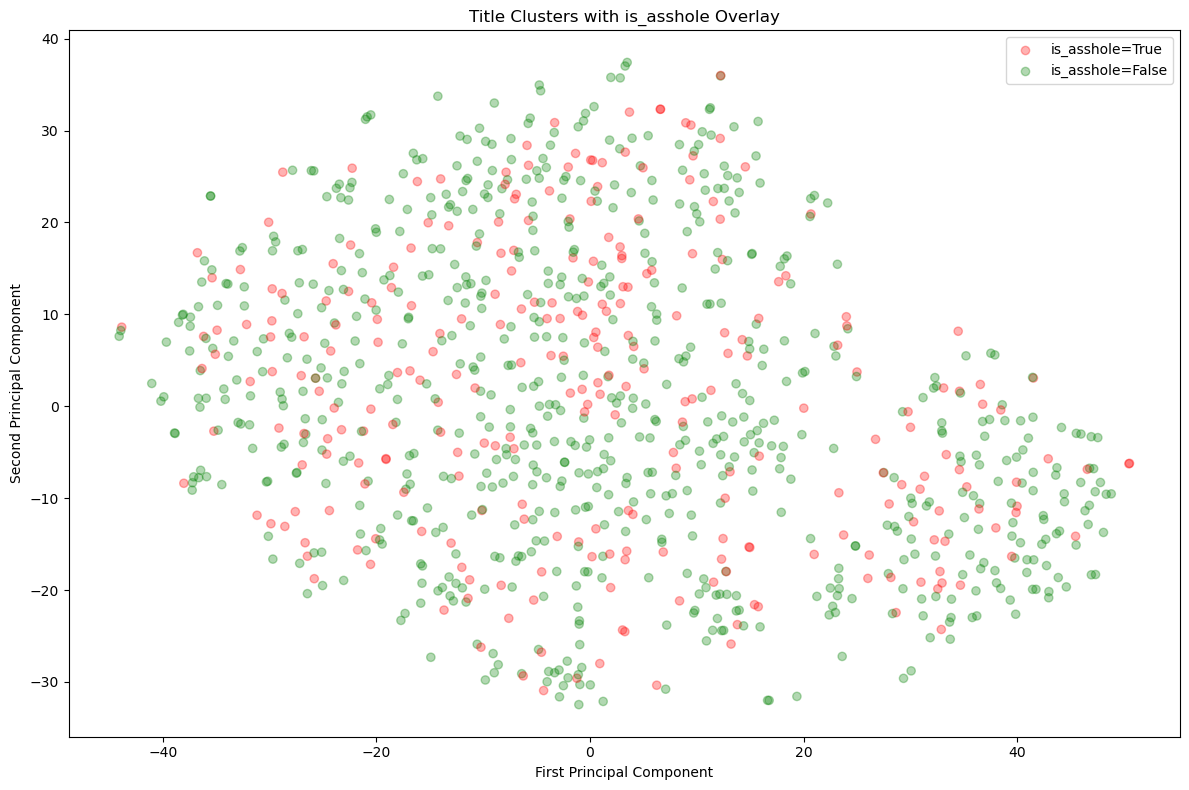

In [40]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'title_embeddings' is high-dimensional
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(title_embeddings)

# Create a scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=is_asshole_colors, alpha=0.3)

plt.title("Title Clusters with is_asshole Overlay")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Add a legend for is_asshole
plt.scatter([], [], c='red', alpha=0.3, label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()

plt.tight_layout()
plt.show()

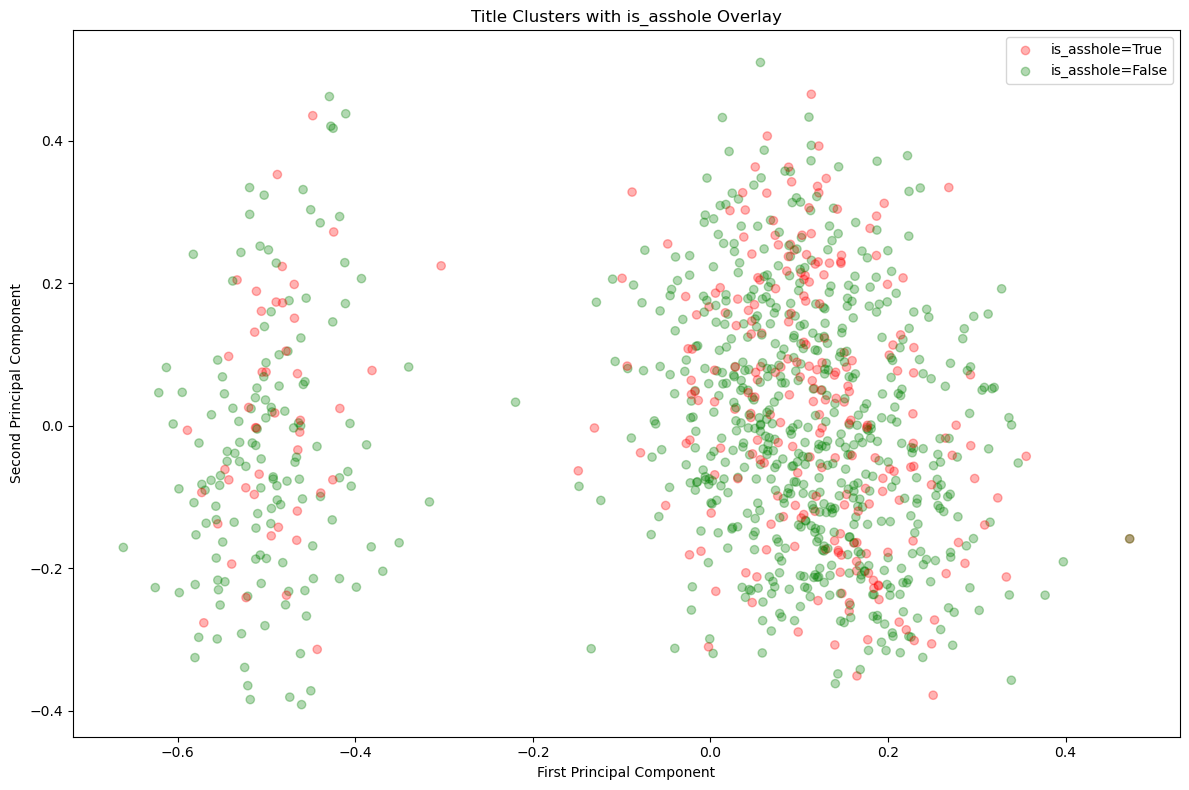

In [41]:
# Reduce dimensionality for visualization
pca = PCA(n_components=3)
reduced_embeddings_pca = pca.fit_transform(title_embeddings)

# Create a scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1],
            c=is_asshole_colors, alpha=0.3)

plt.title("Title Clusters with is_asshole Overlay")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Add a legend for is_asshole
plt.scatter([], [], c='red', alpha=0.3, label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'title_embeddings' is high-dimensional
tsne = TSNE(n_components=3, random_state=42)
reduced_embeddings_tsne3 = tsne.fit_transform(title_embeddings)

/tmp/ipykernel_10755/1161748416.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(reduced_embeddings_tsne3[:, 0], reduced_embeddings_tsne3[:, 1], reduced_embeddings_tsne3[:, 2],


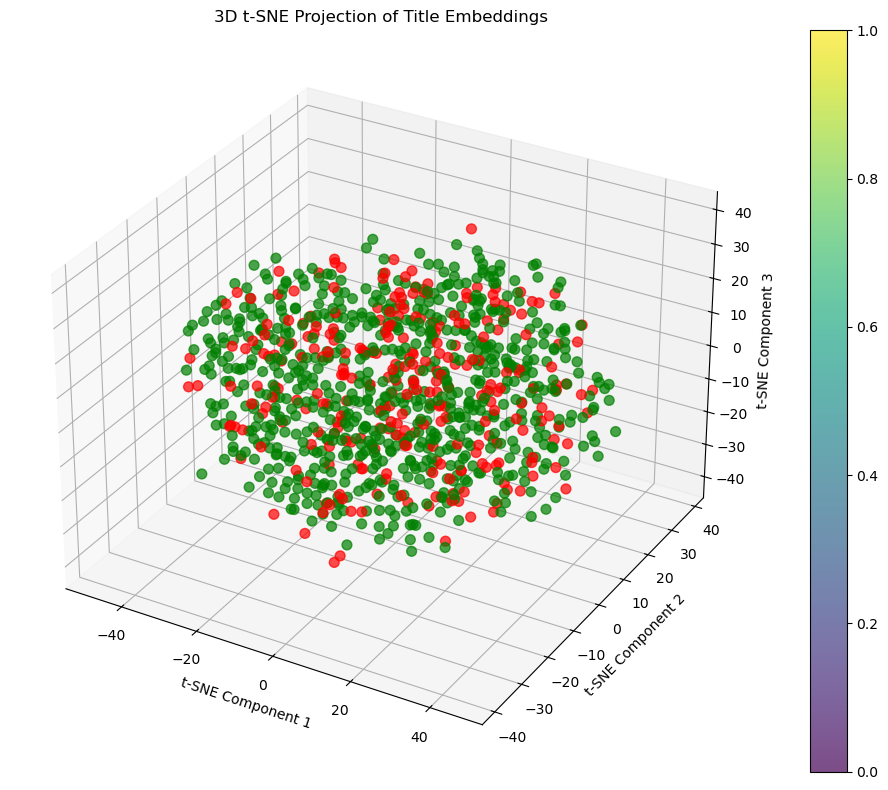

In [47]:

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D, using cluster labels for coloring
scatter = ax.scatter(reduced_embeddings_tsne3[:, 0], reduced_embeddings_tsne3[:, 1], reduced_embeddings_tsne3[:, 2],
                     c=is_asshole_colors, cmap='viridis', s=50, alpha=0.7)

# Add color bar
fig.colorbar(scatter)

# Set titles and labels
ax.set_title('3D t-SNE Projection of Title Embeddings')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.tight_layout()
plt.show()

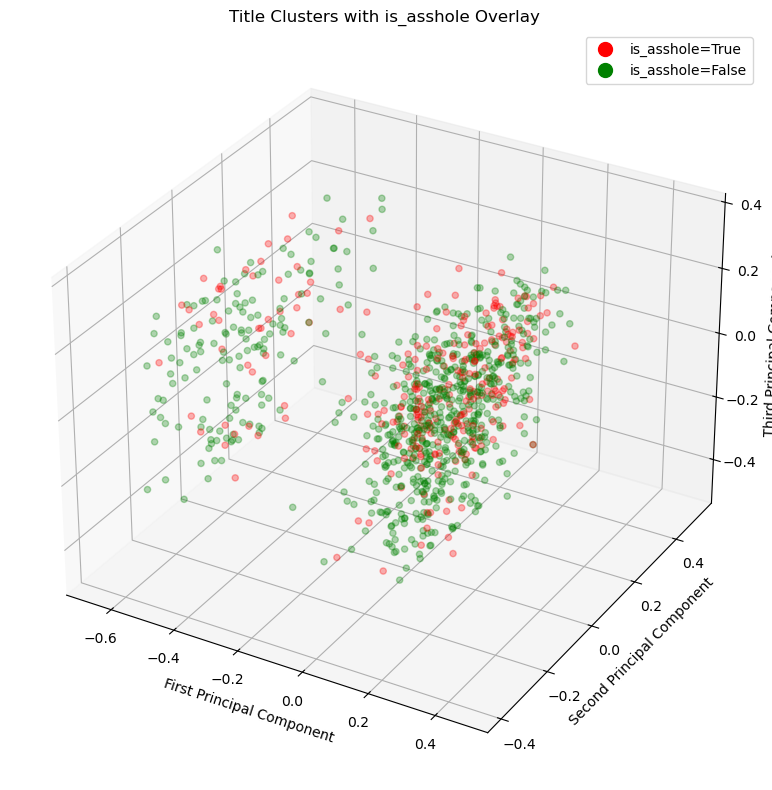

In [48]:
# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings_pca3 = pca.fit_transform(title_embeddings)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Color the points based on 'is_asshole'
is_asshole_colors = ['red' if x else 'green' for x in df['is_asshole']]

# Scatter plot in 3D
scatter = ax.scatter(reduced_embeddings_pca3[:, 0], reduced_embeddings_pca3[:, 1], reduced_embeddings_pca3[:, 2],
                     c=is_asshole_colors, alpha=0.3)

# Set title and labels
ax.set_title("Title Clusters with is_asshole Overlay")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")

# Add a legend for is_asshole
red_patch = plt.Line2D([], [], color='red', marker='o', markersize=10, linestyle='None', label='is_asshole=True')
green_patch = plt.Line2D([], [], color='green', marker='o', markersize=10, linestyle='None', label='is_asshole=False')
ax.legend(handles=[red_patch, green_patch])

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(title_embeddings)

GaussianMixture(n_components=2, random_state=42)

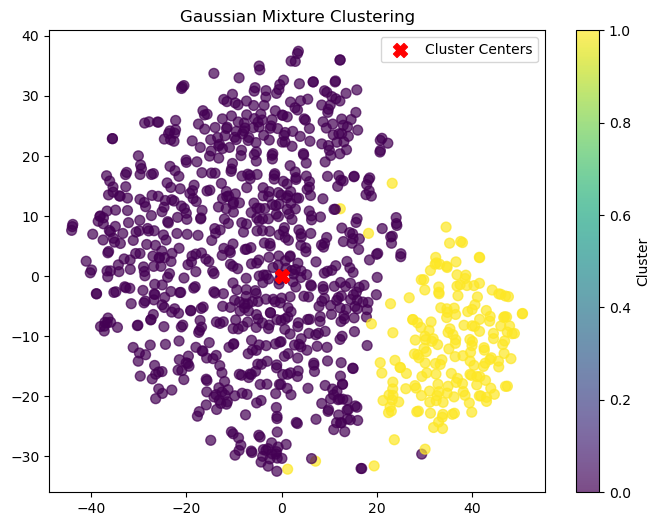

In [45]:
# Get cluster labels and probabilities
labels = gm.predict(title_embeddings)
probs = gm.predict_proba(title_embeddings)
prob_max = np.max(probs, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
plt.title('Gaussian Mixture Clustering')
plt.legend()
plt.show()

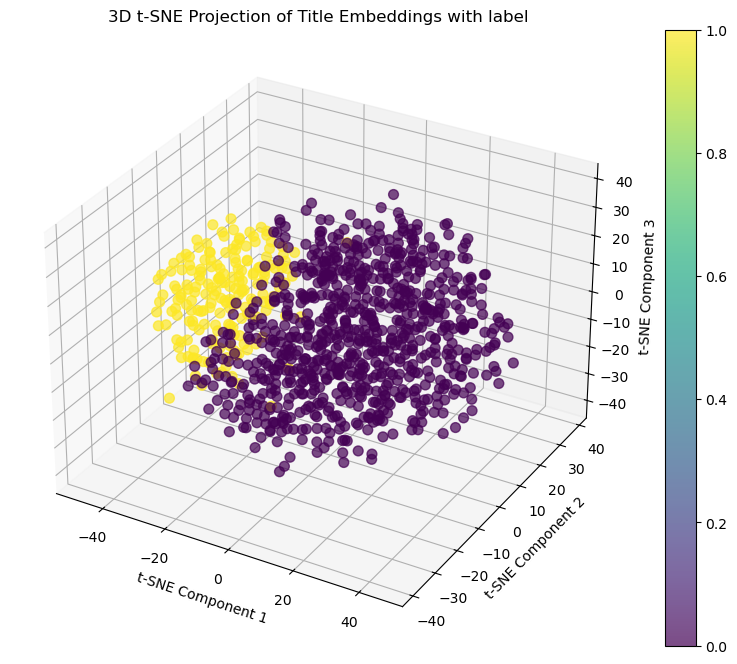

In [46]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D, using cluster labels for coloring
scatter = ax.scatter(reduced_embeddings_tsne3[:, 0], reduced_embeddings_tsne3[:, 1], reduced_embeddings_tsne3[:, 2],
                     c=labels, cmap='viridis', s=50, alpha=0.7)

# Add color bar
fig.colorbar(scatter)

# Set titles and labels
ax.set_title('3D t-SNE Projection of Title Embeddings with label')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()

In [ ]:
# after get embeddings, now can cluster

# Perform K-means clustering
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(title_embeddings)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(title_embeddings)

# Create a scatter plot
plt.figure(figsize=(6, 4))

# Plot points colored by cluster
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.6)

plt.title("Title Clusters with is_asshole Overlay")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Add a color bar for clusters
plt.colorbar(scatter, label='Cluster')

# Add a legend for is_asshole
plt.scatter([], [], c='red', alpha=0.3, label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()

plt.tight_layout()
plt.show()

# Analyze cluster composition
for cluster in range(n_clusters):
    cluster_posts = df[cluster_labels == cluster]
    asshole_ratio = cluster_posts['is_asshole'].mean()
    print(f"Cluster {cluster}:")
    print(f"  Total posts: {len(cluster_posts)}")
    print(f"  Asshole ratio: {asshole_ratio:.2f}")
    print(f"  Sample titles:")
    print(cluster_posts['title'].head().to_string(index=False))
    print()

In [11]:
# Function to load embeddings
def load_embeddings(filename='embeddings.npy'):
    print(f"Loading embeddings from {filename}")
    return np.load(filename)

In [12]:
np.save('title_embeddings.npy',title_embeddings)

In [ ]:
body_embeddings = model.encode(df['body'].tolist())

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already generated title_embeddings and have df['is_asshole']

# Convert embeddings to numpy array if they're not already
X = np.array(title_embeddings)
y = df['is_asshole'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_predictions))

# Random Forest
# takes like forever lol
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_predictions))

# Compare results
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

if lr_accuracy > rf_accuracy:
    print("Logistic Regression performed better in this case.")
elif rf_accuracy > lr_accuracy:
    print("Random Forest performed better in this case.")
else:
    print("Both models performed equally well.")